# Prélimitaire: SageMath et les nombres entiers

### la division euclidienne

In [1]:
divmod(130, 11)

(11, 9)

$(diviseur, reste)=divmod(a, b)$

### l'algorithme d'Euclide

In [2]:
gcd(143, 55)

11

$pgcd = gcd(a, b)$

### l'algorithle d'Euclide étendu

In [3]:
xgcd(143, 55)

(11, 2, -5)

`(pgcd, p, q) = xgcd(a, b)`

$p * a + q * b = pgcd$

### Les nombres premiers

In [4]:
is_prime(11)

True

In [5]:
prime_range(3, 11)

[3, 5, 7]

`liste_prime = prime_range(a, b)`

In [6]:
next_prime(7)

11

### factorisation

In [7]:
factor(308)

2^2 * 7 * 11

`n = len(factor(x))` nombre de facteur différence

`(a, e) = factor(x)[i]`

avec `a` la base et `e` l'exposant 

$x = a_{1}^{e_{1}} + a_{2}^{e_{2}} + ... + a_{n}^{e_{n}}$

### compter les nombres premiers

In [8]:
prime_pi(20)

8

`n = prime_pi(a)` 

`n` est le nombre des premiers inférieur à `a`

# Nombres Premiers

## Sur la répartition des nombres premiers

$u(n)=\pi(n)\frac{\ln{n}}{n}$

1. Evaluer les limites de la commande `prime_pi`.  

In [9]:
import datetime as dt

In [10]:
niveau_exp = 1
while True:
    start_time = dt.datetime.now()
    nb_prime = prime_pi(10 ** niveau_exp)
    end_time = dt.datetime.now()
    if (end_time - start_time).seconds >=60:
        print("Il y {} nombres premiers au niveau de 10E{}.".format(nb_prime,niveau_exp))
        break
    else:
        niveau_exp = niveau_exp + 1

Il y 24739954287740860 nombres premiers au niveau de 10E18.


2. Tracer sur un même graphe $n \mapsto \pi(n)$ et $n \mapsto \frac{n}{\ln{n}}$

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
n_graphe = np.arange(0,1E8,1E3)
pi_n = np.array([prime_pi(int(n)) for n in n_graphe])
n_ln_n = n_graphe/np.log(n_graphe)

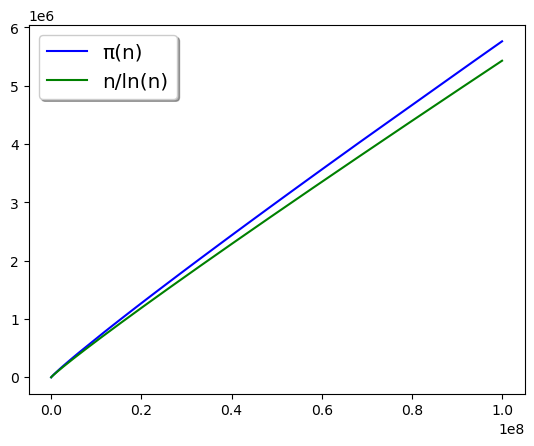

In [13]:
fig_prime_pi, ax_prime_pi = plt.subplots()
ax_prime_pi.plot(n_graphe, pi_n, "b", label = "π(n)")
ax_prime_pi.plot(n_graphe, n_ln_n, "g", label = "n/ln(n)")
legend_prime_pi = ax_prime_pi.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

3. Tracer sur un graphe $u_{n}$ en fonction de n.

In [14]:
u_n = pi_n / n_ln_n

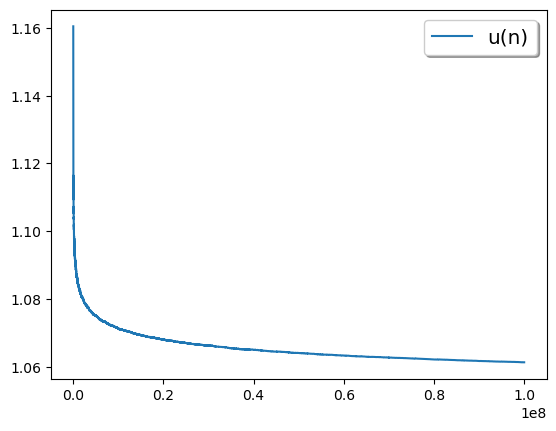

In [15]:
fig_u_n, ax_u_n = plt.subplots()
ax_u_n.plot(n_graphe, u_n, label = "u(n)")
legend_u_n = ax_u_n.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

$\lim_{x \to \infty} \pi(n) \frac{\ln{n}}{n} = 1$

4. Comparer aussi $\pi(n)$ à la fonction d'écart logarithmique intégrale $Li(n) = \int_{2}^{n} \frac{dt}{\ln(t)}$

In [16]:
t = SR.var('t')
li = integral(1/ln(t), (t,2,3))
li_n = np.array([numerical_integral(1/ln(t),2,int(n))[0] for n in n_graphe])

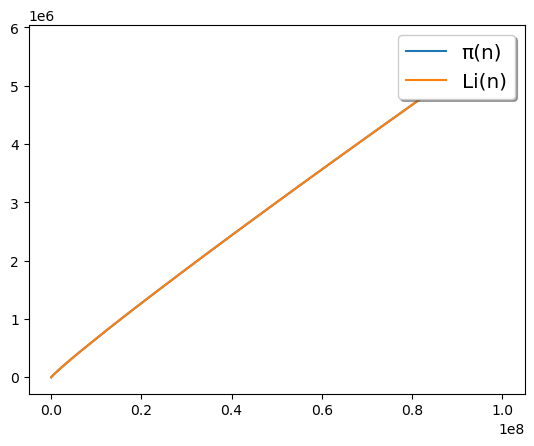

In [17]:
fig_li_n, ax_li_n = plt.subplots()
ax_li_n.plot(n_graphe, pi_n, label = "π(n)")
ax_li_n.plot(n_graphe, li_n, label = "Li(n)")
legend_li_n = ax_li_n.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

$\pi(n) \simeq Li(n)$

## Nombres de Fermat

$F_n = 2^{2^{n}} + 1$

In [18]:
ind_n_fremat = 0
while True:
    if is_prime(2 ** (2 ** ind_n_fremat) + 1):
        ind_n_fremat = ind_n_fremat + 1
        continue
    else:
        print("le nombre {} quand n est équal à {} n'est pas prémier.".format(2 ** (2 ** ind_n_fremat) + 1, ind_n_fremat))
        break

le nombre 4294967297 quand n est équal à 5 n'est pas prémier.


## Nombres de Mersenne

Montrer que les nombres de la forme $M_p = 2^p - 1$, ne peuvent être premiers qui si $p$ est lui-même premier.

1. Former la liste des nombres premiers inférieurs ou égaux à 257.

In [19]:
prime_le_257 = prime_range(257.5)

In [20]:
prime_pi(257)

55

In [21]:
mersenne_p = [2 ** n - 1 for n in prime_le_257]

**Démonstration :** $M_p = 2^p - 1$ est premier que si p est premier.

Si p n'est pas premier, on a $p = k * l$.

$2^{p} - 1 = (2^{k * l} - 1) = (2^{k} - 1) * (2^{k(l - 1)} + 2^{k(l - 2)} + ... + 2^{0})$

Donc, on a $M_p \notin \mathbb{P}$ est toujours composé.

2. Donner les nombres de Mersenne qui sont des nombres premiers.

In [22]:
[prime_le_257[ind] for ind,bool in enumerate([is_prime(nombre_mersenne) for nombre_mersenne in mersenne_p]) if bool == True]

[2, 3, 5, 7, 13, 17, 19, 31, 61, 89, 107, 127]

3. Décomposer $M_{41}$ et $M_{47}$ en facteurs premiers

In [23]:
factor(2 ** 41 - 1)

13367 * 164511353

In [24]:
factor(2 ** 47 - 1)

2351 * 4513 * 13264529

4. Vérifier que $n = 2^{p-1}M_p$ est parfait.

In [25]:
def est_parfait(nombre):
    return sum(divisors(nombre)) == nombre * 2

In [26]:
[prime_le_257[ind] for ind,bool in enumerate([est_parfait(2 ** (m_p - 1) * mersenne_p[i]) for i, m_p in enumerate(prime_le_257)]) if bool == True]

[2, 3, 5, 7, 13, 17, 19, 31, 61, 89, 107, 127]

## Un test de primalité pour les nombres de Mersenne

**Théorème de Lucas:** Si $M_p$ est un premier, on a $L_{p-1} \% M_p = 0 \; (\forall p \ge 2)$ 

In [8]:
nb_prime = 2
p_mp_prime = 2

start_time = dt.datetime.now()

while True:
    if is_prime(2 ** nb_prime - 1):
        p_mp_prime = nb_prime
    nb_prime = next_prime(nb_prime)
    
    end_time = dt.datetime.now()
    
    if (end_time - start_time).seconds >= 5*60:
        print("2E{} - 1 est le plus grand premier trouvé dans 5 mins.".format(p_mp_prime))
        break
    else:
        continue

2E4253 - 1 est le plus grand premier trouvé dans 5 mins.


Donc, l'algorithme de Lucas est plus rapide que `is_prime`

# Algorithme d'exponentiation

## Naïf itératif et naïf récursif

In [1]:
def exp_recursif(x, n):
    if n == 0:
        return 1
    else:
        return x * exp_recursif(x, n - 1)

In [2]:
def exp_iteratif(x, n):
    res = 1
    for i in range(n):
        res = res * x
    return res

La complexité ci-dessus est $O(n)$

## Dichotomique itératif et dichotomique récursif

In [3]:
def exp_dichotomique_recursif(x, n):
    if n == 0:
        return 1
    elif n % 2 == 0:
        return exp_dichotomique_recursif(x, n/2) ** 2
    else:
        return exp_dichotomique_recursif(x, (n - 1)/2) ** 2 * x

In [4]:
def exp_dichotomique_iteratif(x, n):
    res = 1
    while n > 0:
        if n % 2 == 1:
            res = res * x
        x = x ** 2
        n = n // 2
    return res

La complexité ci-dessus est $O(\ln{n})$

In [5]:
exp_dichotomique_recursif(2,9)

512

## Algorithme d'exponentiation modulaire

Pour calculer $x^n \% N$

In [6]:
def mod_exp_dichotomique_recursif(x, n, N):
    if n == 0:
        return 1
    elif n % 2 == 0:
        return mod_exp_dichotomique_recursif(x, n/2, N) ** 2 % N
    else: 
        return mod_exp_dichotomique_recursif(x, (n - 1)/2, N) ** 2 * x % N

In [7]:
16.powermod(120,10) == mod_exp_dichotomique_recursif(16,120,10)

True

In [8]:
def mod_exp_dichotomique_iteratif(x, n, N):
    res = 1
    while n > 0:
        if n % 2 == 1:
            res = res * x % N
        x = x ** 2 % n
        n = n // 2
    return res

In [9]:
16.powermod(120,10) == mod_exp_dichotomique_iteratif(16,120,10)

True

La complexité ci-dessus est $O(\ln{n})$

# Cryptosystème RSA

## Introduction

1. Choisir 2 nombres premiers $p$, $q$.
2. $N = p * q$
3. $\phi(N) = (p - 1)(q * 1)$
4. Trouver $e$, $pgcd(e, \phi(n)) = 1$
5. **Clé publique:** $(e, N)$
6. **Clé privé:** $(d, N)$ avec $ed \equiv 1 \; (mod \; \phi(N))$
7. Chiffrer: $y = x^e \; mod \; N$ (x est le mot de passe original, y est encrypté)
8. Déchiffrer: $x = y^d \; mod \; N$

## L'ensemble des messages, codage, décodage

In [10]:
S1=AlphabeticStrings();
S2=HexadecimalStrings();
S3=BinaryStrings();

In [11]:
original="Que j'aime a faire connaitre un nombre utile aux sages"

In [12]:
original2="Que jaimeafaire connaitreunnombre utileauxsages"

In [13]:
S1.encoding(original).decoding()

'QUEJAIMEAFAIRECONNAITREUNNOMBREUTILEAUXSAGES'

In [14]:
S1.encoding(original) == S1.encoding(original2)

True

Donc `S1` n'est pas injectif

In [15]:
S2.encoding(original).decoding()

"Que j'aime a faire connaitre un nombre utile aux sages"

In [16]:
S3.encoding(original).decoding()

"Que j'aime a faire connaitre un nombre utile aux sages"

Pour calculer les bits d'un chiffre ≤ N besoin:

Si $x$ est le nombre du bit,

$2^{x + 1} - 2 \ge N$

$x \ge \log_{2}(N + 2) - 1$

$x = \lfloor \log_{2}(N + 2) \rfloor$

In [17]:
def numerise(message, N):
    # rentrer une liste des chiffres ≤ N
    lst_entier = []
    msg_binaire = BinaryStrings().encoding(message)
    nb_binaire = len(msg_binaire)
    nb_bits = int(log(N + 2, 2))
    nb_paquet = ceil(nb_binaire / nb_bits)
    nb_zero_ajouter = nb_paquet * nb_bits - nb_binaire
    msg_binaire = "0" * nb_zero_ajouter + str(msg_binaire)
    for i in range(nb_paquet):
        msg_binaire_morceau = msg_binaire[i * nb_bits: (i + 1) * nb_bits]
        lst_entier.append(int(str(msg_binaire_morceau),2))
    return lst_entier

In [18]:
from sage.crypto.util import bin_to_ascii

In [19]:
def alphabetise(lst_entier, N):
    msg = ""
    nb_bits = int(log(N + 2, 2))
    for ent in lst_entier:
        msg = msg + format(ent, "0{}b".format(nb_bits))
    while msg[0]=="0":
        msg = msg[1:]
    nb_zero_ajouter = (8 - (len(msg) % 8)) % 8
    msg = "0" * nb_zero_ajouter + msg
    msg_alpha = bin_to_ascii(msg)
    return msg_alpha

In [20]:
numerise("123154",35)

[1, 17, 6, 8, 25, 19, 2, 13, 9, 20]

In [21]:
alphabetise([1, 17, 6, 8, 25, 19, 2, 13, 9, 20], 35)

'123154'

In [22]:
numerise("123154",24)

[3, 1, 3, 2, 3, 3, 3, 1, 3, 5, 3, 4]

In [23]:
alphabetise([3, 1, 3, 2, 3, 3, 3, 1, 3, 5, 3, 4], 24)

'123154'

## La génération de clés RSA

1. Quelles sont les recommandations de la société RSA Data-Security?

2. Pourquoi les nombres de Mersenne premiers doivent être évités? 

    Les nombres de Mersenne premiers sont des nombres premiers spécifiques qui sont de la forme $2^p - 1$, où p est également un nombre premier. Ils doivent être évités dans le contexte de la cryptographie RSA car ils présentent des propriétés mathématiques spécifiques qui pourraient potentiellement faciliter certaines attaques cryptanalytiques. De plus, les nombres de Mersenne premiers sont rares et en utilisant ces nombres, on réduit l'espace des clés possibles, rendant ainsi le système plus vulnérable.

3. Pourquoi l'exposant de chiffrement $e$ ne doit pas être choisi trop petit?

    L'exposant de chiffrement e est utilisé dans l'algorithme RSA pour calculer le texte chiffré à partir du texte en clair. Si e est choisi trop petit, cela peut conduire à des attaques efficaces qui compromettent la sécurité du système cryptographique. Par exemple, l'attaque de Wiener, qui exploite les faiblesses de RSA lorsque l'exposant de chiffrement est petit, permet à un attaquant de déterminer la clé privée à partir de la clé publique. Afin de garantir un niveau de sécurité suffisant, il est recommandé de choisir un exposant de chiffrement suffisamment grand, typiquement un nombre premier impair comme 65537 ($2^{16} + 1$) qui est couramment utilisé en raison de ses propriétés mathématiques.

In [24]:
import random
import datetime as dt

In [25]:
def cleRSA(m):
    p = random_prime(2^2048, false, 10^m)
    q = random_prime(2^2048, false, 10^m)
    N = p * q
    phi_N = (p - 1) * (q - 1)
    e = random.randint(2^16, N)
    while gcd(e, phi_N) != 1:
        e = random.randint(2^16, N)
    d = mod(xgcd(e, phi_N)[1], phi_N)
    return N, e, d

In [26]:
(RSA_N,RSA_e,RSA_d) = cleRSA(30)

In [4]:
time_start = dt.datetime.now()
factor(RSA_N)
(time_start - dt.datetime.now()).seconds

Ça prends trops longtemps.

## Fonctions de chiffrement et déchiffrement RSA

In [27]:
def chiffrerRSA(lst_msg, cle_prive):
    (d, N) = cle_prive
    return list(map(power_mod, lst_msg, [d] * len(lst_msg), [N] * len(lst_msg)))

In [28]:
def dechiffrerRSA(lst_msg, cle_publique):
    return chiffrerRSA(lst_msg, cle_publique)

In [29]:
msg_original = "SageMath calcule exactement dans des entiers de taille arbitrairement grande. Outre + et *, on utilisera aussi la division euclidienne (divmod), l’algorithme d’Euclide (gcd) et l’algorithme d’Euclide étendu (xgcd).Le théorème fondamental de l’arithmétique affirme que tout nombre entier s’écrit comme produit de nombres premiers et qu’une telle écriture est unique à l’ordre des facteurs près. Les nombres premiers sont ainsi les notes de la musique des nombres. SageMath possède quelques commandes très utiles pour travailler avec les nombres premiers : is_prime, prime_range, next_prime, factor, prime_pi."
lst_msg_original = numerise(msg_original,RSA_N)
lst_msg_encrypte = chiffrerRSA(lst_msg_original, (RSA_e, RSA_N))

In [30]:
lst_msg_dechiffre = dechiffrerRSA(lst_msg_encrypte, (RSA_d, RSA_N))
alphabetise(lst_msg_dechiffre, RSA_N)

'SageMath calcule exactement dans des entiers de taille arbitrairement grande. Outre + et *, on utilisera aussi la division euclidienne (divmod), l\x19algorithme d\x19Euclide (gcd) et l\x19algorithme d\x19Euclide étendu (xgcd).Le théorème fondamental de l\x19arithmétique affirme que tout nombre entier s\x19écrit comme produit de nombres premiers et qu\x19une telle écriture est unique à l\x19ordre des facteurs près. Les nombres premiers sont ainsi les notes de la musique des nombres. SageMath possède quelques commandes très utiles pour travailler avec les nombres premiers : is_prime, prime_range, next_prime, factor, prime_pi.'

## Signature avec RSA

In [31]:
(RSA_NA, RSA_eA, RSA_dA) = cleRSA(100)
(RSA_NB, RSA_eB, RSA_dB) = cleRSA(100)

1. **Protocole 1:** message + signature

In [32]:
def protocole1_chiffrer(m1, s1, RSA_NA, RSA_dA, RSA_NB, RSA_eB, NC):
    m1c = numerise(m1, NC)
    s1c = numerise(s1, NC)
    
    m2c = chiffrerRSA(m1c, (RSA_eB, RSA_NB))
    s2c = chiffrerRSA(s1c, (RSA_dA, RSA_NA))
    
    return (m2c, s2c)

In [33]:
def protocole1_dechiffrer(m2c, s2c, RSA_NA, RSA_eA, RSA_NB, RSA_dB, NC):
    m1c = dechiffrerRSA(m2c, (RSA_dB, RSA_NB))
    s1c = dechiffrerRSA(s2c, (RSA_eA, RSA_NA))
    
    m1 = alphabetise(m1c, NC)
    s1 = alphabetise(s1c, NC)
    
    return (m1, s1)

2. **Protocole 2:** message signé

In [34]:
def protocole2_chiffrer(m1, RSA_NA, RSA_dA, RSA_NB, RSA_eB, NC):
    
    m1c = numerise(m1, NC)
    
    if RSA_NA >= RSA_NB:
        m2c = chiffrerRSA(m1c, (RSA_eB, RSA_NB))
        m3c = chiffrerRSA(m2c, (RSA_dA, RSA_NA))
    else:
        m2c = chiffrerRSA(m1c, (RSA_dA, RSA_NA))
        m3c = chiffrerRSA(m2c, (RSA_eB, RSA_NB))
        
    return m3c

In [35]:
def protocole2_dechiffrer(m3c, RSA_NA, RSA_eA, RSA_NB, RSA_dB, NC):
    
    if RSA_NA >= RSA_NB:
        m2c = dechiffrerRSA(m3c, (RSA_eA, RSA_NA))
        m1c = dechiffrerRSA(m2c, (RSA_dB, RSA_NB))
    else:
        m2c = dechiffrerRSA(m3c, (RSA_dB, RSA_NB))
        m1c = dechiffrerRSA(m2c, (RSA_eA, RSA_NA))
    
    m1 = alphabetise(m1c, NC)
    
    return m1

Si $N_A = N_B$, on peut arriver à decoder n'importe quel ordre.

# Factorisation de clefs RSA

Algorithme naïf

In [36]:
def factor_fermat(N):
    l0 = 1
    u = 0
    n = l0 + u
    L = l0
    R0 = ceil(sqrt(L * N))
    R = R0 + u
    S = sqrt(R ** 2 - L * N)
    while floor(S) != S:
        for L in range(l0, n):
            u = n - L
            R0 = ceil(sqrt(L * N))
            R = R0 + u
            S =sqrt(R ** 2 - L * N)
        n = n + 1
        L0 = L
    print(L - 1, gcd(N, R - S), gcd(N, R + S))

# Tests de primalité probabilistes

1. Test de Fermat

In [37]:
def teste_fermat(n, a):
    if (a ** (n - 1) % n) == 1:
        return True
    else:
        return False

In [38]:
nb_teste = 2
while True:
    
    if is_prime(nb_teste):
        nb_teste = nb_teste + 1
        continue
    
    if teste_fermat(nb_teste, 2) and teste_fermat(nb_teste, 3) and teste_fermat(nb_teste, 4) and teste_fermat(nb_teste, 5):
        print("Le plus petit composé qui passe le test de Fermat est {}.".format(nb_teste))
        break
    else:
        nb_teste = nb_teste + 1
        continue

Le plus petit composé qui passe le test de Fermat est 1729.


2. Test de Miller-Rabin

In [39]:
def temoin_de_miller(n, a):
    s = 0
    d = 1
    facts = factor(n - 1)
    if facts[0][0] == 2:
        s = facts[0][1]
        d = n // (2 ** s)
    else:
        d = n
    x = a ** d % n
    
    if x == 1 or x == n - 1:
        return False
    for i in range(s-1):
        x = x ** 2 % n
        if x == n - 1:
            return False
    return True # n est composé
    

In [8]:
nb_teste = 2
while True:
    
    if is_prime(nb_teste):
        nb_teste = nb_teste + 1
        continue
    
    if temoin_de_miller(nb_teste, 2) or temoin_de_miller(nb_teste, 3) or temoin_de_miller(nb_teste, 4) or temoin_de_miller(nb_teste, 5):
        nb_teste = nb_teste + 1
        continue
    else:
        print("Le plus petit composé qui passe le test de Fermat est {}.".format(nb_teste))
        break
        

In [9]:
nb_teste

1539593

on a testé tous les nombres inférieur que 1539593, il n'y a pas d'eurreur